# Audiobooks Business Case Project:

In [1]:
import numpy as np

import tensorflow as tf 

from sklearn import preprocessing

In [2]:
raw_csv_data = np.loadtxt('33_Audiobooks_data_Without_Headers.csv', delimiter = ',')

> # Challenge 1:
>>Why we did not use **PANDAS** for reading the .csv file?

In [4]:
unscaled_inputs_all = raw_csv_data[:,1:-1]

targets_all = raw_csv_data[:,-1]

# Note:
>* the statement sequence [start : stop] returns the items 
`sequence[start]` and `sequence [stop-1]`, and all the items between them.

# Balance the dataset

In [5]:
num_one_targets = int(np.sum(targets_all))
print(num_one_targets)

2237


# Recall that:
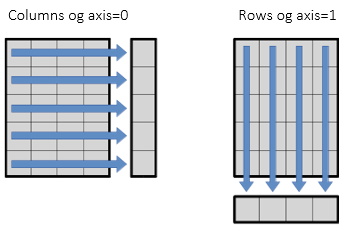

In [6]:
zero_targets_counter = 0

indices_to_remove = []

# this is a list. You can check this by using the following code 
# type(indices_to_remove)

for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

## Pay attention to `np.delete`
>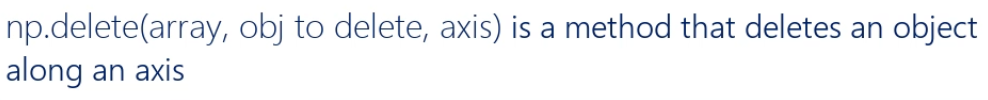

In [7]:
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis=0)

targets_equal_priors = np.delete(targets_all, indices_to_remove, axis=0)

# Standardize the inputs

In [8]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

> # Challenge 2:
>>- At the end, you should try to run the algorithm WITHOUT this line of code (In the above cell). The result will be interesting. Give it a shot.

# Shuffle the data

# Note: 
>* When the data was collected, it was actually arranged by date.
>- Shuffle the indices of the data, so the data is not arranged in any way when we feed it.
>- Since we will be batching, we want the data to be as randomly spread out as possible.

# Take care of `np.arange`
> 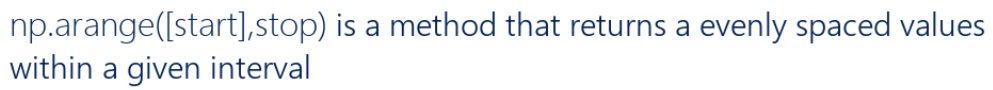
> - For integer arguments the function is equivalent to the Python built-in range function, but returns an ndarray rather than a list.
>> - Example:  np.arange(3)
>> - Output: array([0, 1, 2])

In [9]:
shuffled_indices = np.arange(scaled_inputs.shape[0])

np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs[shuffled_indices]

shuffled_targets = targets_equal_priors[shuffled_indices]

# Split the dataset into train, validation, and test

In [10]:
samples_count = shuffled_inputs.shape[0]
samples_count

4474

- assuming we want 80-10-10 distribution of **training, validation, and test**.

In [11]:
train_samples_count = int(0.8 * samples_count)

validation_samples_count = int(0.1 * samples_count)

test_samples_count = samples_count - train_samples_count - validation_samples_count

print(train_samples_count, validation_samples_count, test_samples_count)

3579 447 448


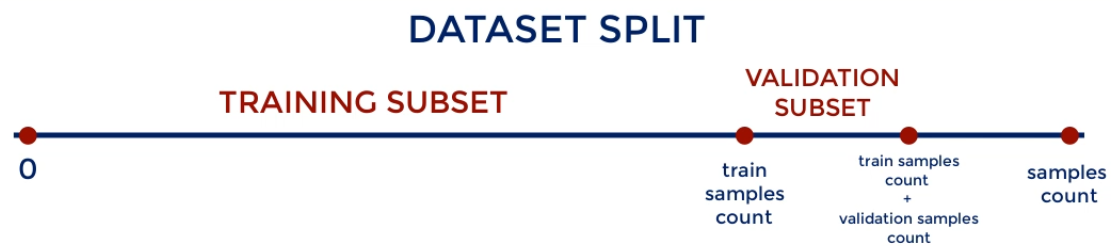

In [12]:
train_inputs = shuffled_inputs[:train_samples_count]

train_targets = shuffled_targets[:train_samples_count]

In [13]:
validation_inputs = shuffled_inputs[train_samples_count : train_samples_count + validation_samples_count]

validation_targets = shuffled_targets[train_samples_count : train_samples_count + validation_samples_count]

In [14]:
test_inputs = shuffled_inputs[train_samples_count + validation_samples_count:]

test_targets = shuffled_targets[train_samples_count + validation_samples_count:]

In [15]:
print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)

print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1782.0 3579 0.4979044425817267
231.0 447 0.5167785234899329
224.0 448 0.5


# Save the three datasets in *.npz

In [16]:
np.savez('Audiobooks_data_train', inputs = train_inputs, targets = train_targets)

np.savez('Audiobooks_data_validation', inputs = validation_inputs, targets = validation_targets)

np.savez('Audiobooks_data_test', inputs = test_inputs, targets = test_targets)

# Loading our Data from the `npz files`

>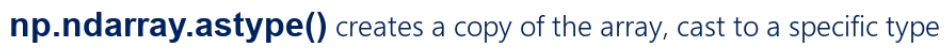

In [17]:
npz = np.load('Audiobooks_data_train.npz')

train_inputs = npz['inputs'].astype(float)

In [18]:
train_targets = npz['targets'].astype(int)

# Note:
> - targets must be int because of sparse_categorical_crossentropy (we want to be able to smoothly one-hot encode them)

In [19]:
npz2 = np.load('Audiobooks_data_validation.npz')

validation_inputs, validation_targets = npz2['inputs'].astype(float), npz2['targets'].astype(int)

In [20]:
npz3 = np.load('Audiobooks_data_test.npz')

test_inputs, test_targets = npz3['inputs'].astype(float), npz3['targets'].astype(int)

# Our Model
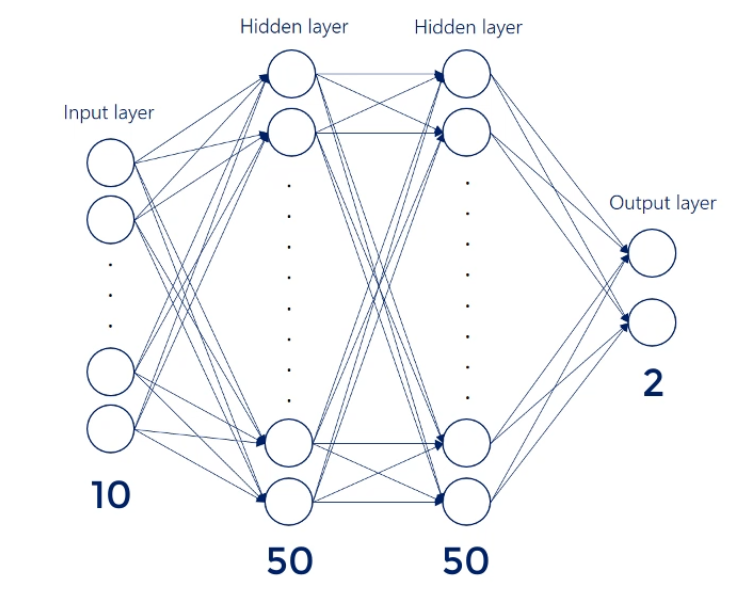

In [21]:
input_size = 10

output_size = 2

hidden_layer_size = 50

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'), 
    
    tf.keras.layers.Dense(output_size, activation='softmax')
])

>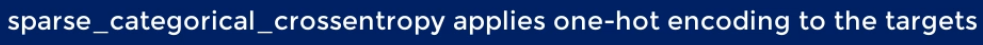

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [24]:
batch_size = 100

max_epochs = 100

- fit the model, just note that this time the train, validation and test data are not iterable as in the **MNIST** case

In [25]:
model.fit(train_inputs, 
          
          train_targets,
          
          batch_size=batch_size, 
          
          epochs=max_epochs, 
          
          validation_data=(validation_inputs, validation_targets), 
          
          verbose = 2)  

Epoch 1/100
36/36 - 0s - loss: 0.6014 - accuracy: 0.6658 - val_loss: 0.5074 - val_accuracy: 0.7450
Epoch 2/100
36/36 - 0s - loss: 0.4652 - accuracy: 0.7664 - val_loss: 0.4247 - val_accuracy: 0.7673
Epoch 3/100
36/36 - 0s - loss: 0.4088 - accuracy: 0.7910 - val_loss: 0.4007 - val_accuracy: 0.7584
Epoch 4/100
36/36 - 0s - loss: 0.3815 - accuracy: 0.8025 - val_loss: 0.3800 - val_accuracy: 0.7987
Epoch 5/100
36/36 - 0s - loss: 0.3695 - accuracy: 0.7988 - val_loss: 0.3611 - val_accuracy: 0.8188
Epoch 6/100
36/36 - 0s - loss: 0.3588 - accuracy: 0.8122 - val_loss: 0.3548 - val_accuracy: 0.7987
Epoch 7/100
36/36 - 0s - loss: 0.3533 - accuracy: 0.8128 - val_loss: 0.3539 - val_accuracy: 0.7919
Epoch 8/100
36/36 - 0s - loss: 0.3477 - accuracy: 0.8159 - val_loss: 0.3436 - val_accuracy: 0.8210
Epoch 9/100
36/36 - 0s - loss: 0.3441 - accuracy: 0.8153 - val_loss: 0.3531 - val_accuracy: 0.8166
Epoch 10/100
36/36 - 0s - loss: 0.3424 - accuracy: 0.8203 - val_loss: 0.3352 - val_accuracy: 0.8300
Epoch 11/

36/36 - 0s - loss: 0.3055 - accuracy: 0.8385 - val_loss: 0.3139 - val_accuracy: 0.8389
Epoch 84/100
36/36 - 0s - loss: 0.3065 - accuracy: 0.8349 - val_loss: 0.3194 - val_accuracy: 0.8054
Epoch 85/100
36/36 - 0s - loss: 0.3059 - accuracy: 0.8335 - val_loss: 0.3131 - val_accuracy: 0.8456
Epoch 86/100
36/36 - 0s - loss: 0.3061 - accuracy: 0.8262 - val_loss: 0.3086 - val_accuracy: 0.8434
Epoch 87/100
36/36 - 0s - loss: 0.3083 - accuracy: 0.8326 - val_loss: 0.3207 - val_accuracy: 0.8188
Epoch 88/100
36/36 - 0s - loss: 0.3067 - accuracy: 0.8321 - val_loss: 0.3142 - val_accuracy: 0.8300
Epoch 89/100
36/36 - 0s - loss: 0.3018 - accuracy: 0.8357 - val_loss: 0.3063 - val_accuracy: 0.8367
Epoch 90/100
36/36 - 0s - loss: 0.3038 - accuracy: 0.8335 - val_loss: 0.3118 - val_accuracy: 0.8389
Epoch 91/100
36/36 - 0s - loss: 0.3038 - accuracy: 0.8351 - val_loss: 0.3075 - val_accuracy: 0.8546
Epoch 92/100
36/36 - 0s - loss: 0.3075 - accuracy: 0.8335 - val_loss: 0.3239 - val_accuracy: 0.8188
Epoch 93/100


# Note that
>- sometimes our validation loss increase. So, we are overfitting. Therefore, we should use the `early stopping` mechanism. 
>-  **callbacks** are functions called by a task when a task is completed. The task here is to check if **`val_loss`** is increasing

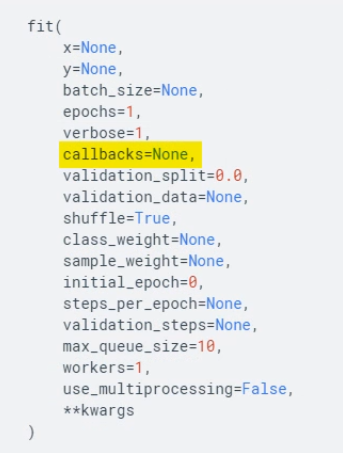

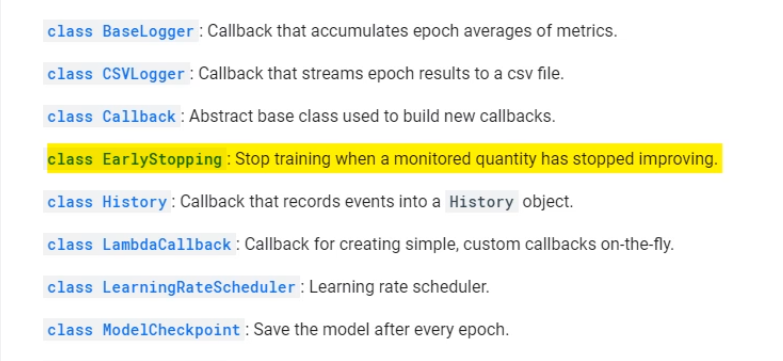

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping()

>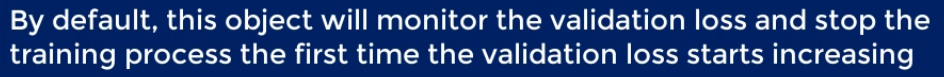

In [27]:
model.fit(train_inputs,
          
          train_targets, 
          
          batch_size=batch_size, 
          
          epochs=max_epochs,
          
          callbacks=[early_stopping], 
          
          validation_data=(validation_inputs, validation_targets),
          
          verbose = 2 
          )  

Epoch 1/100
36/36 - 0s - loss: 0.3042 - accuracy: 0.8357 - val_loss: 0.3318 - val_accuracy: 0.7987
Epoch 2/100
36/36 - 0s - loss: 0.3030 - accuracy: 0.8338 - val_loss: 0.3113 - val_accuracy: 0.8456
Epoch 3/100
36/36 - 0s - loss: 0.3052 - accuracy: 0.8276 - val_loss: 0.3063 - val_accuracy: 0.8345
Epoch 4/100
36/36 - 0s - loss: 0.3017 - accuracy: 0.8340 - val_loss: 0.3058 - val_accuracy: 0.8367
Epoch 5/100
36/36 - 0s - loss: 0.3004 - accuracy: 0.8357 - val_loss: 0.3078 - val_accuracy: 0.8658


- let's take the **`patience`** into accout

>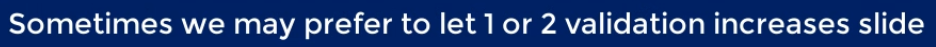

>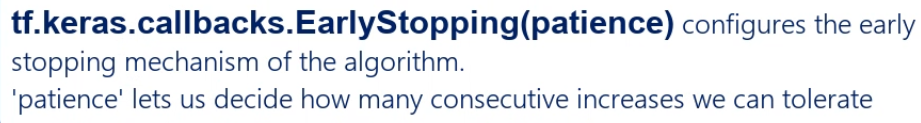

In [29]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 4)


model.fit(train_inputs,
          train_targets, 
          
          batch_size = batch_size, 
          
          epochs = max_epochs,
          
          callbacks = [early_stopping], 
          
          validation_data = (validation_inputs, validation_targets),
          
          verbose = 2 
          )  

Epoch 1/100
36/36 - 0s - loss: 0.3038 - accuracy: 0.8343 - val_loss: 0.3102 - val_accuracy: 0.8277
Epoch 2/100
36/36 - 0s - loss: 0.3041 - accuracy: 0.8360 - val_loss: 0.3194 - val_accuracy: 0.8098
Epoch 3/100
36/36 - 0s - loss: 0.3016 - accuracy: 0.8371 - val_loss: 0.3310 - val_accuracy: 0.8076
Epoch 4/100
36/36 - 0s - loss: 0.3028 - accuracy: 0.8326 - val_loss: 0.3110 - val_accuracy: 0.8277
Epoch 5/100
36/36 - 0s - loss: 0.3046 - accuracy: 0.8343 - val_loss: 0.3156 - val_accuracy: 0.8479


# Test the model

As we discussed in the lectures, after training on the training data and validating on the validation data, we test the final prediction power of our model by running it on the test dataset that the algorithm has NEVER seen before.

It is very important to realize that fiddling with the hyperparameters overfits the validation dataset. 

The test is the absolute final instance. You should not test before you are completely done with adjusting your model.

If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.

>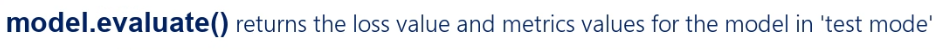

In [30]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

14/14 [==============================] - 0s 3ms/step - loss: 0.3663 - accuracy: 0.7835


In [31]:
print('Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(test_loss, test_accuracy*100.))

Test loss: 0.37. Test accuracy: 78.35%


>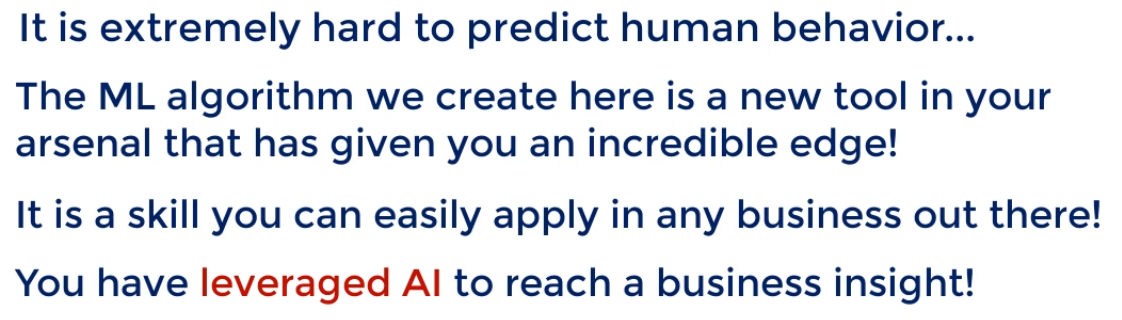